In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## getting polygon data

In [2]:
df=pd.read_json('neighbourhoods.geojson')
df_point_map={'x':[],'y':[],'neighbour':[]}
df_point_map=pd.DataFrame(df_point_map)
count=0
for i in range(len(df)):
    name=df['features'][i]['properties']['neighbourhood']
    n=len(df['features'][i]['geometry']['coordinates'][0][0])
    for j in range(n):
        tmp_df=df['features'][i]['geometry']['coordinates'][0][0][j]
        tmp_df.append(name)
        df_point_map.loc[count]=tmp_df
        count+=1

## getting listing data

In [85]:
df=pd.read_csv('listings.csv')

In [86]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [87]:
df=df.loc[:,['neighbourhood','latitude','longitude','room_type','host_name']]

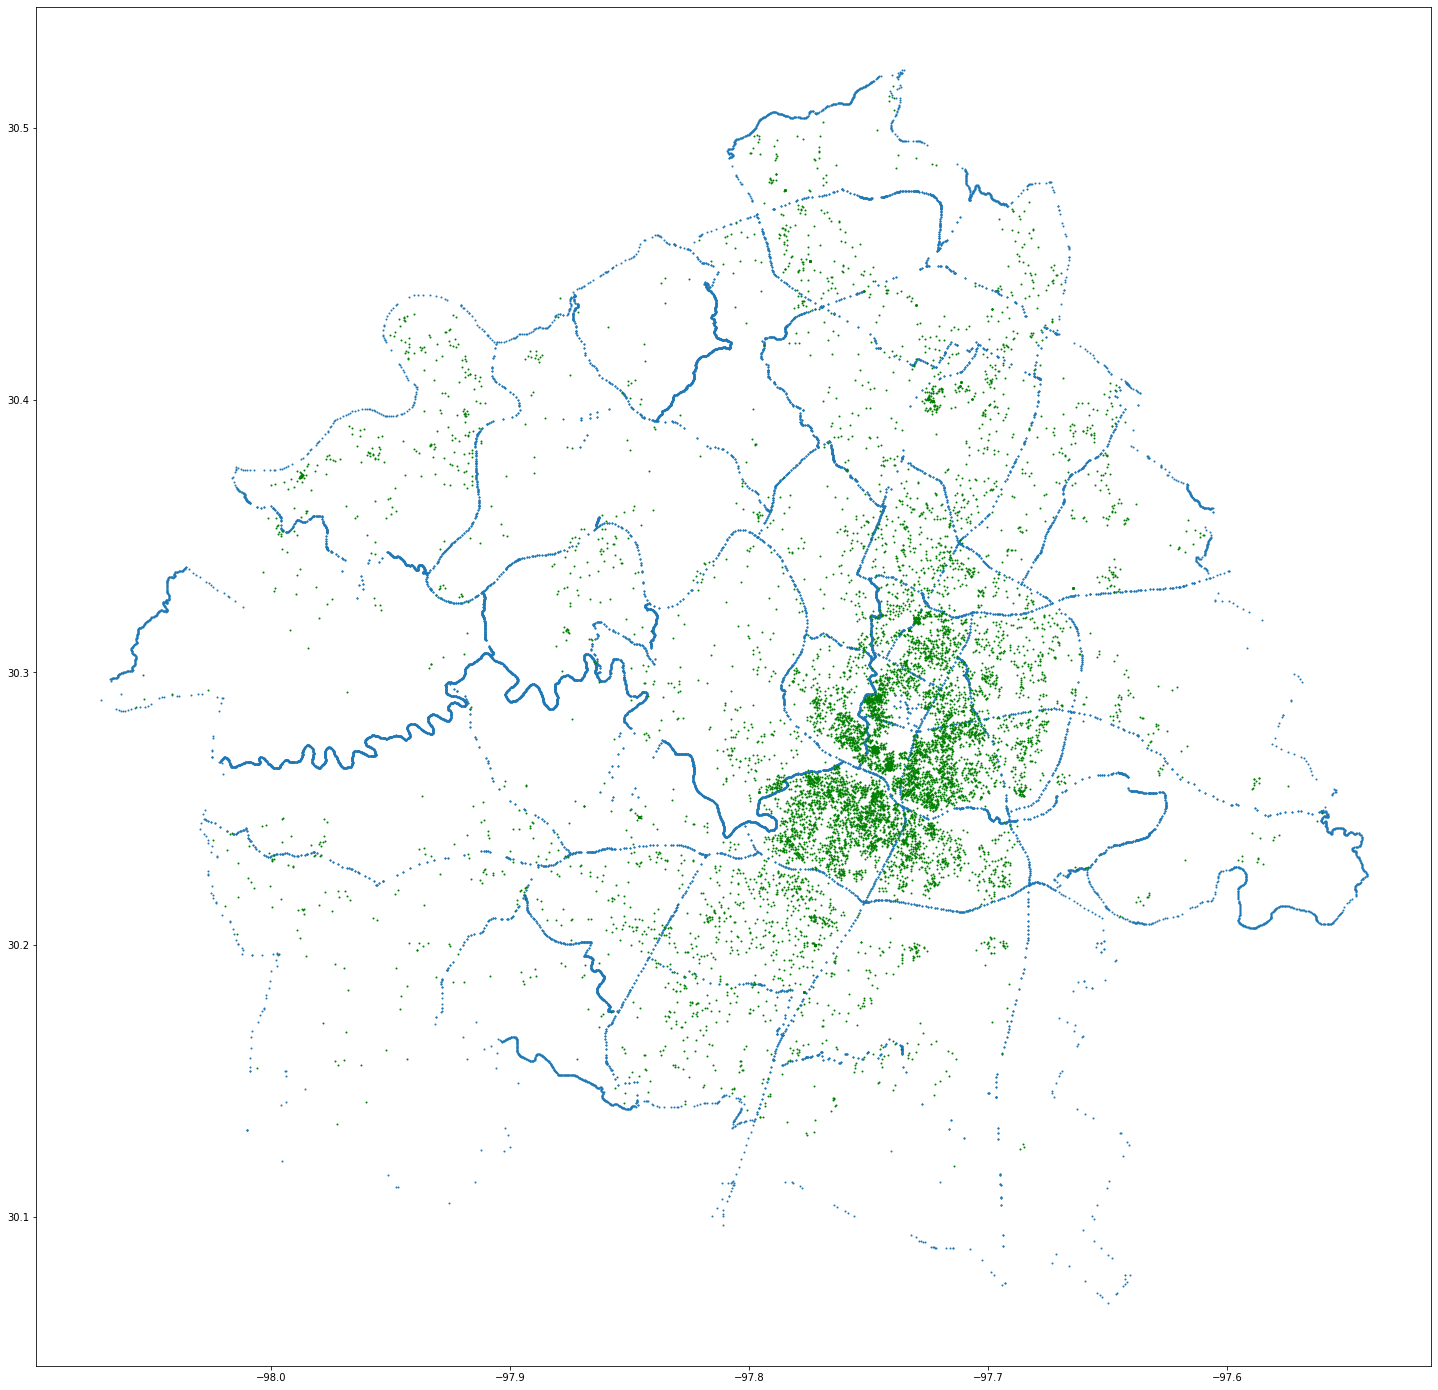

In [89]:
plt.figure(figsize=(25, 25))
plt.scatter(df_point_map['x'],df_point_map['y'],s=1)
plt.scatter(df['longitude'],df['latitude'],color='green',s=1)
plt.show()

## top Areas of highest number of listing

In [90]:
data=df.groupby('neighbourhood')['neighbourhood'].describe()[['count']]
data.sort_values(by=['count'],ascending=False).head()


,count
neighbourhood,
78704,1822.0
78702,1263.0
78701,713.0
78741,622.0
78703,530.0


## thematic map for Entire home

In [28]:
tmp_df=df.loc[df['room_type']=="Entire home/apt"]

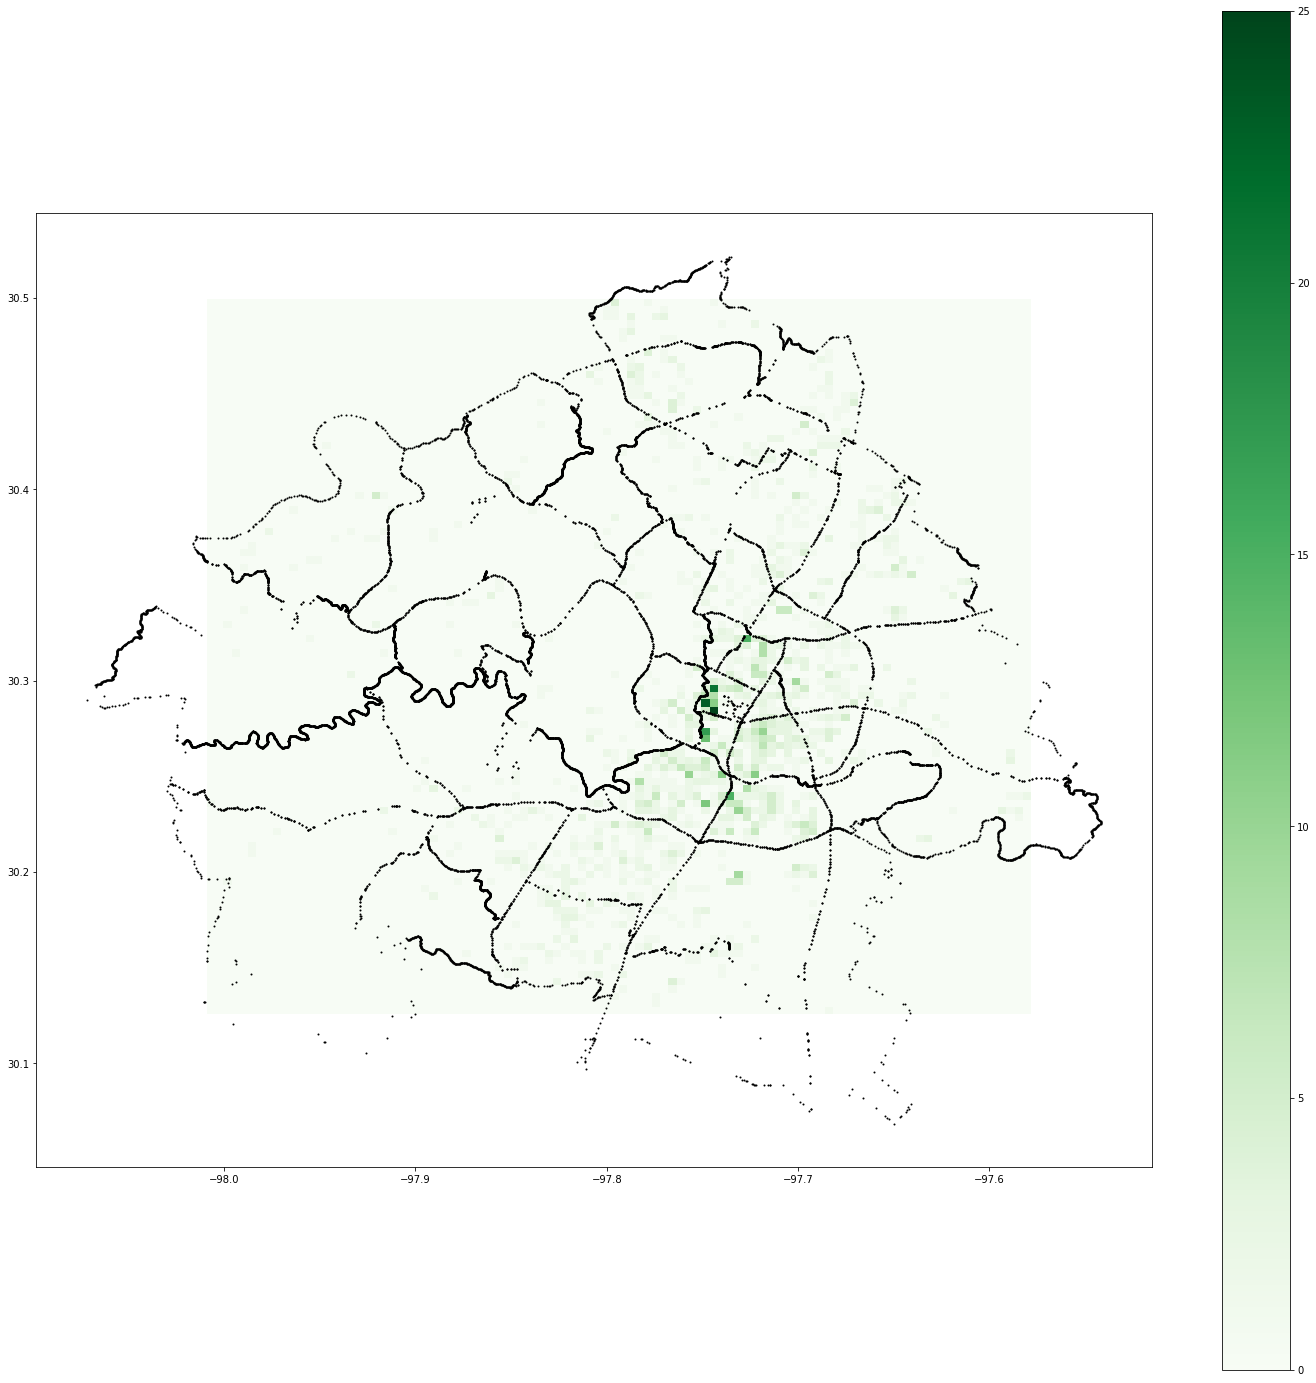

In [82]:
heatmap, xedges, yedges = np.histogram2d(tmp_df['longitude'],tmp_df['latitude'], bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(25, 25))
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='Greens')
plt.colorbar()
plt.scatter(df_point_map['x'],df_point_map['y'],color='black',s=1)
plt.savefig('city_entirehome.png')
plt.show()


## thematic map private room 


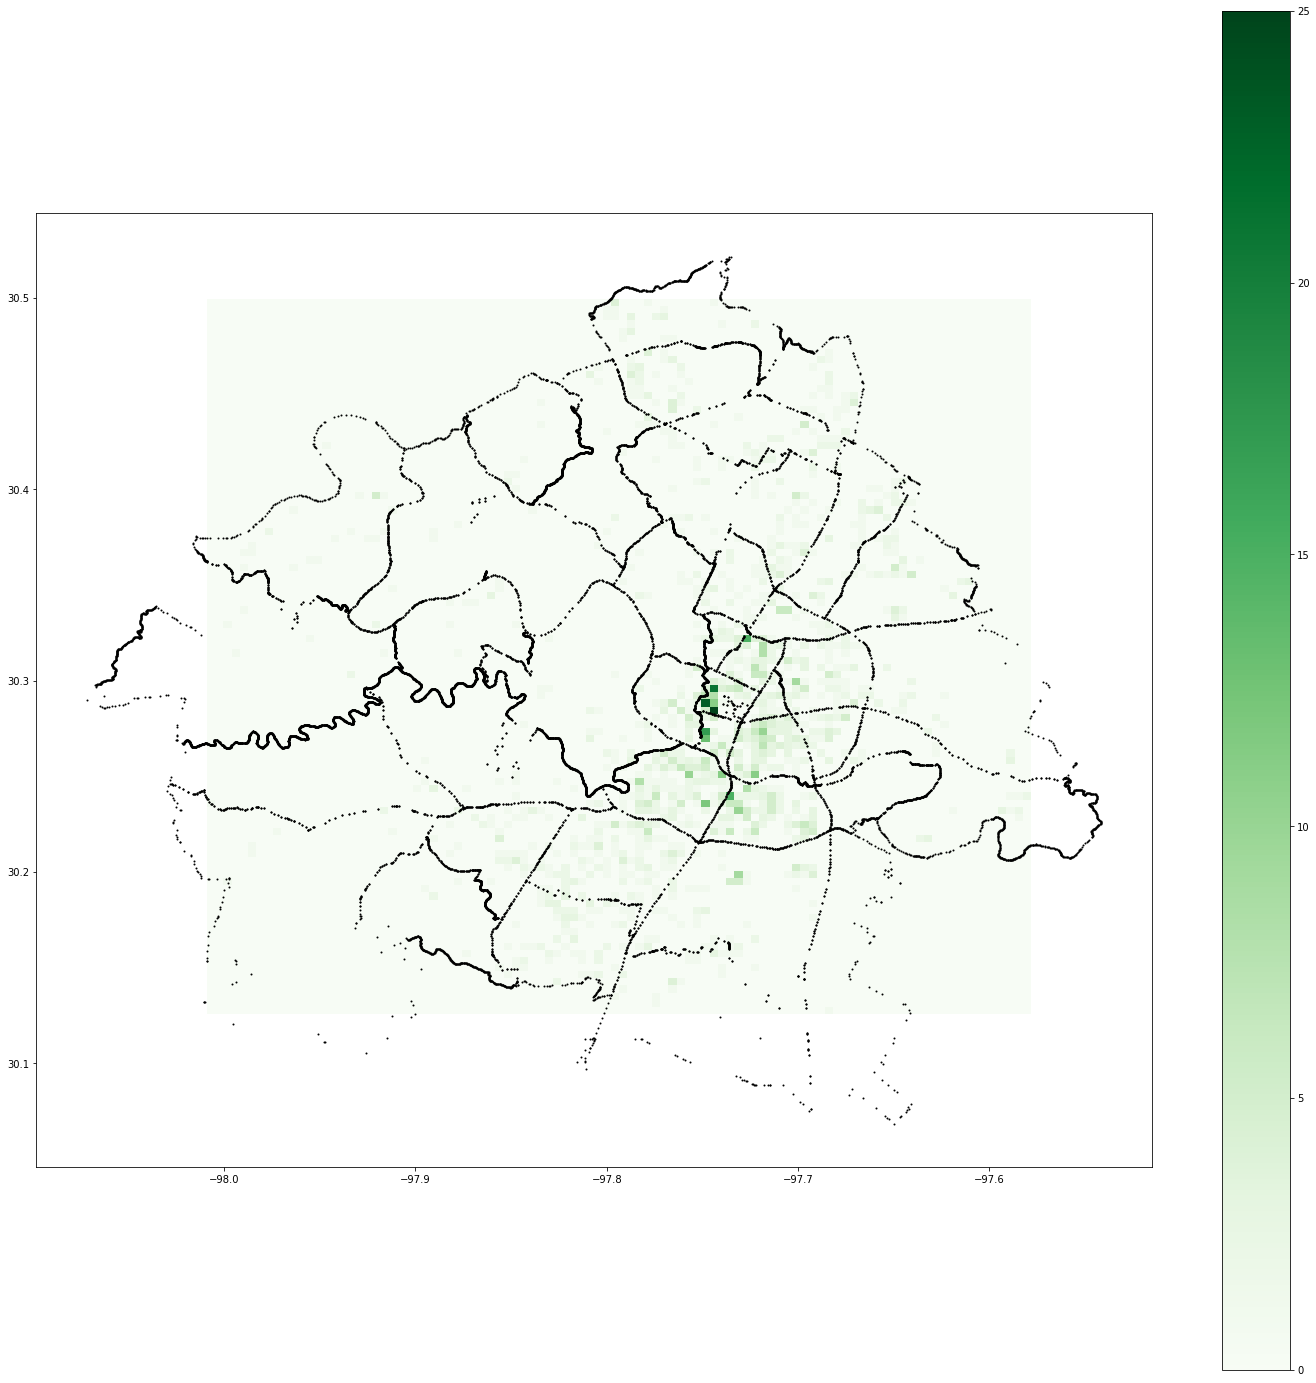

In [83]:
tmp_df=df.loc[df['room_type']=="Private room"]
heatmap, xedges, yedges = np.histogram2d(tmp_df['longitude'],tmp_df['latitude'], bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.figure(figsize=(25, 25))
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='Greens')
plt.colorbar()
plt.scatter(df_point_map['x'],df_point_map['y'],color='black',s=1)
plt.savefig('city_Private room.png')
plt.show()

## top 10 host by their no of listing

In [91]:
data=df.groupby('host_name')['host_name'].describe()[['count']]
data.sort_values(by=['count'],ascending=False).head(10)

,count
host_name,
Kia,398
WanderJaunt,131
TurnKey Vacation Rentals,124
Martin,101
Michael,98
David,76
Sarah,74
Ryan,67
James,62
